In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_theme('notebook')

# 任务一

- $Z=X+\eta Y$
- 自己设定不同的参数$\mu_1, \sigma_1^2, \mu_2,\sigma_2^2,p$,分别用计算机生成1000（也可以是别的数）个混合高斯分布的随机数；
- 画出其频率分布直方图;
- 讨论不同参数对其分布“峰”的影响.

In [2]:
def generate_gauss_mixture(mu1, sigma1, mu2, sigma2, p, n=1000):
    X = np.random.normal(loc=mu1, scale=sigma1, size=n)
    Y = np.random.normal(loc=mu2, scale=sigma2, size=n)
    eta = np.random.binomial(1, p, size=n)
    Z = X + eta * Y
    return Z

<Axes: title={'center': 'Base model: $(X, Y)\\sim \\mathcal{N}(5,2;10,2;0),\\ p=0.25$'}, ylabel='Count'>

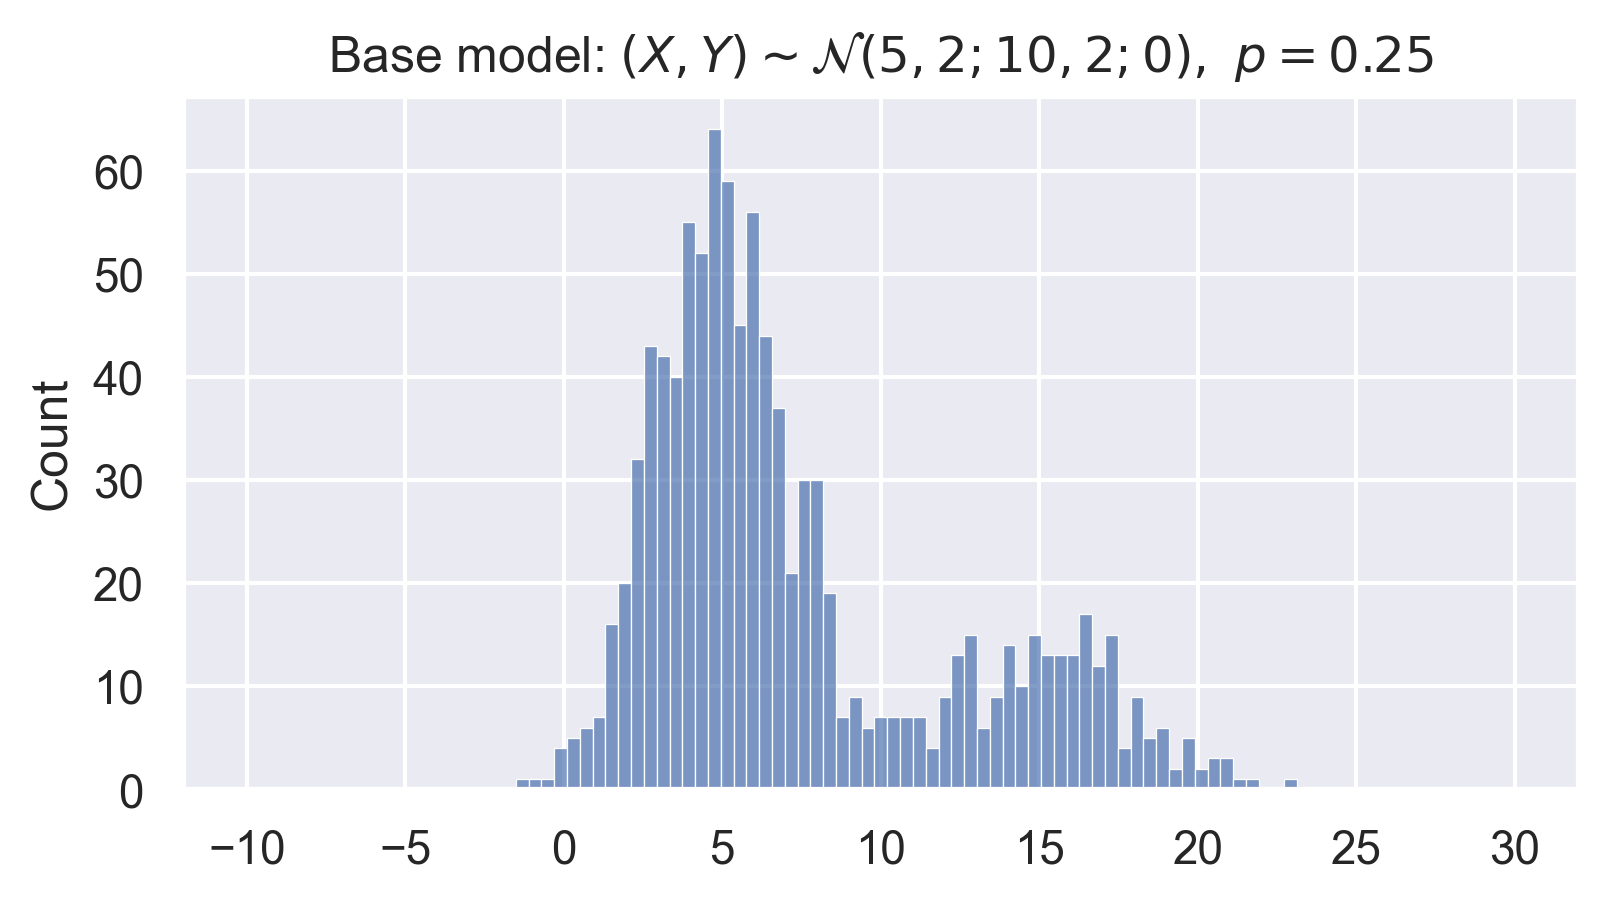

In [3]:
plt.figure(dpi=300, figsize=(6,3))
tmp = generate_gauss_mixture(5, 2, 10, 2, 0.25)
plt.title('Base model: $(X, Y)\sim \mathcal{N}(5,2;10,2;0),\ p=0.25$')
sns.histplot(tmp, bins=np.linspace(-10, 30, 100), alpha=0.7)

<Axes: ylabel='Density'>

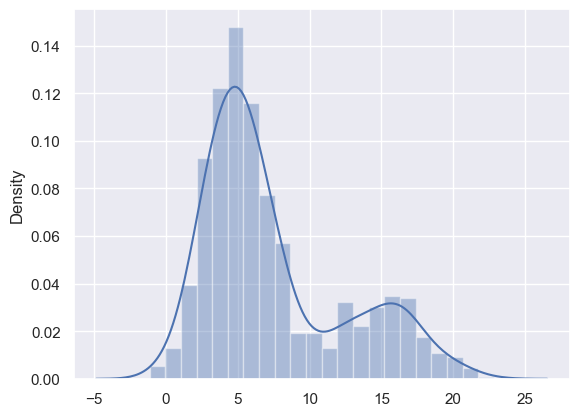

In [4]:
sns.distplot(tmp)

## 参数$p$的影响

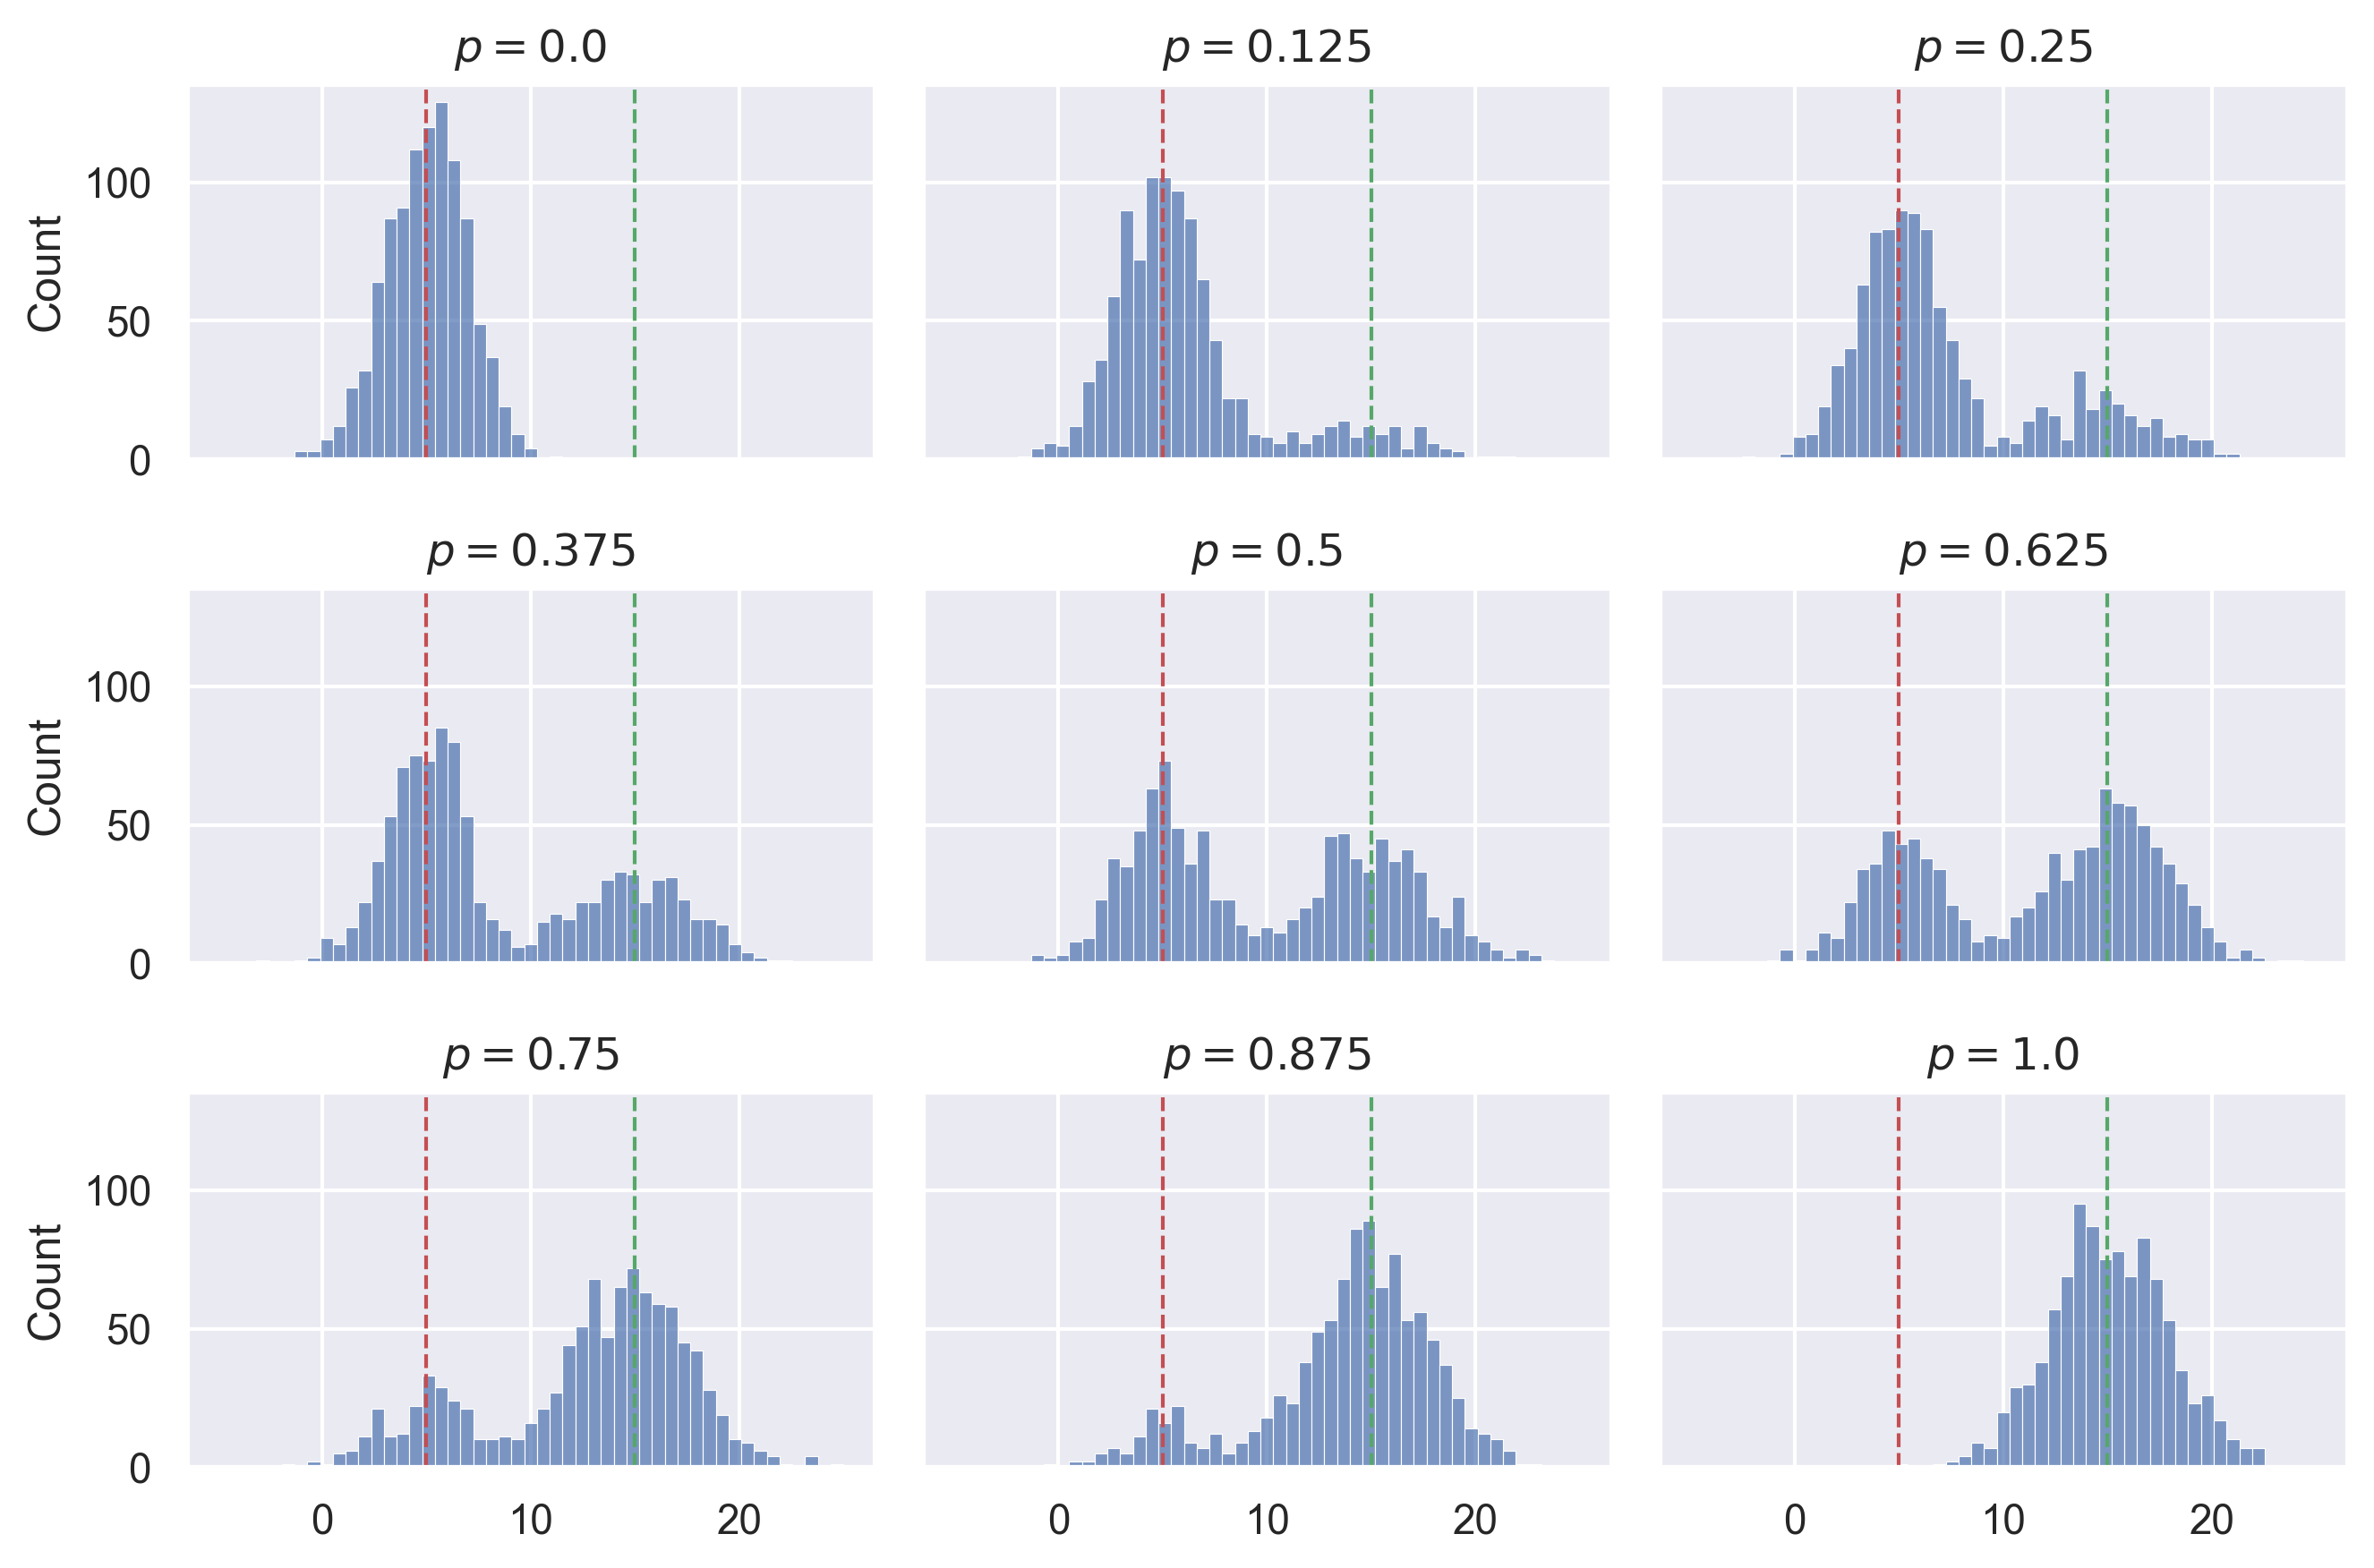

In [5]:
fig, ax = plt.subplots(ncols=3, nrows=3, dpi=300, figsize=(9, 6), 
                      sharex=True, sharey=True)
axes = ax.flatten()

df = pd.DataFrame()
ps = np.linspace(0, 1, 9)
for i in range(len(ps)):
    p = ps[i]
    df[p] = generate_gauss_mixture(5, 2, 10, 2, p)
    sns.histplot(df[p], ax=axes[i], bins=np.linspace(-5, 25, 50), alpha=0.7)
    axes[i].set_title(f'$p={p}$')
    axes[i].set_xlabel('')
    axes[i].axvline(x=5, color='r', ls='--', lw=1)
    axes[i].axvline(x=15, color='g', ls='--', lw=1)
    
plt.tight_layout()

In [6]:
legend = ['$p=0$',
 '$p=\\frac{1}{8}$',
 '$p=\\frac{1}{4}$',
 '$p=\\frac{3}{8}$',
 '$p=\\frac{1}{2}$',
 '$p=\\frac{5}{8}$',
 '$p=\\frac{3}{4}$',
 '$p=\\frac{7}{8}$',
 '$p=1$']

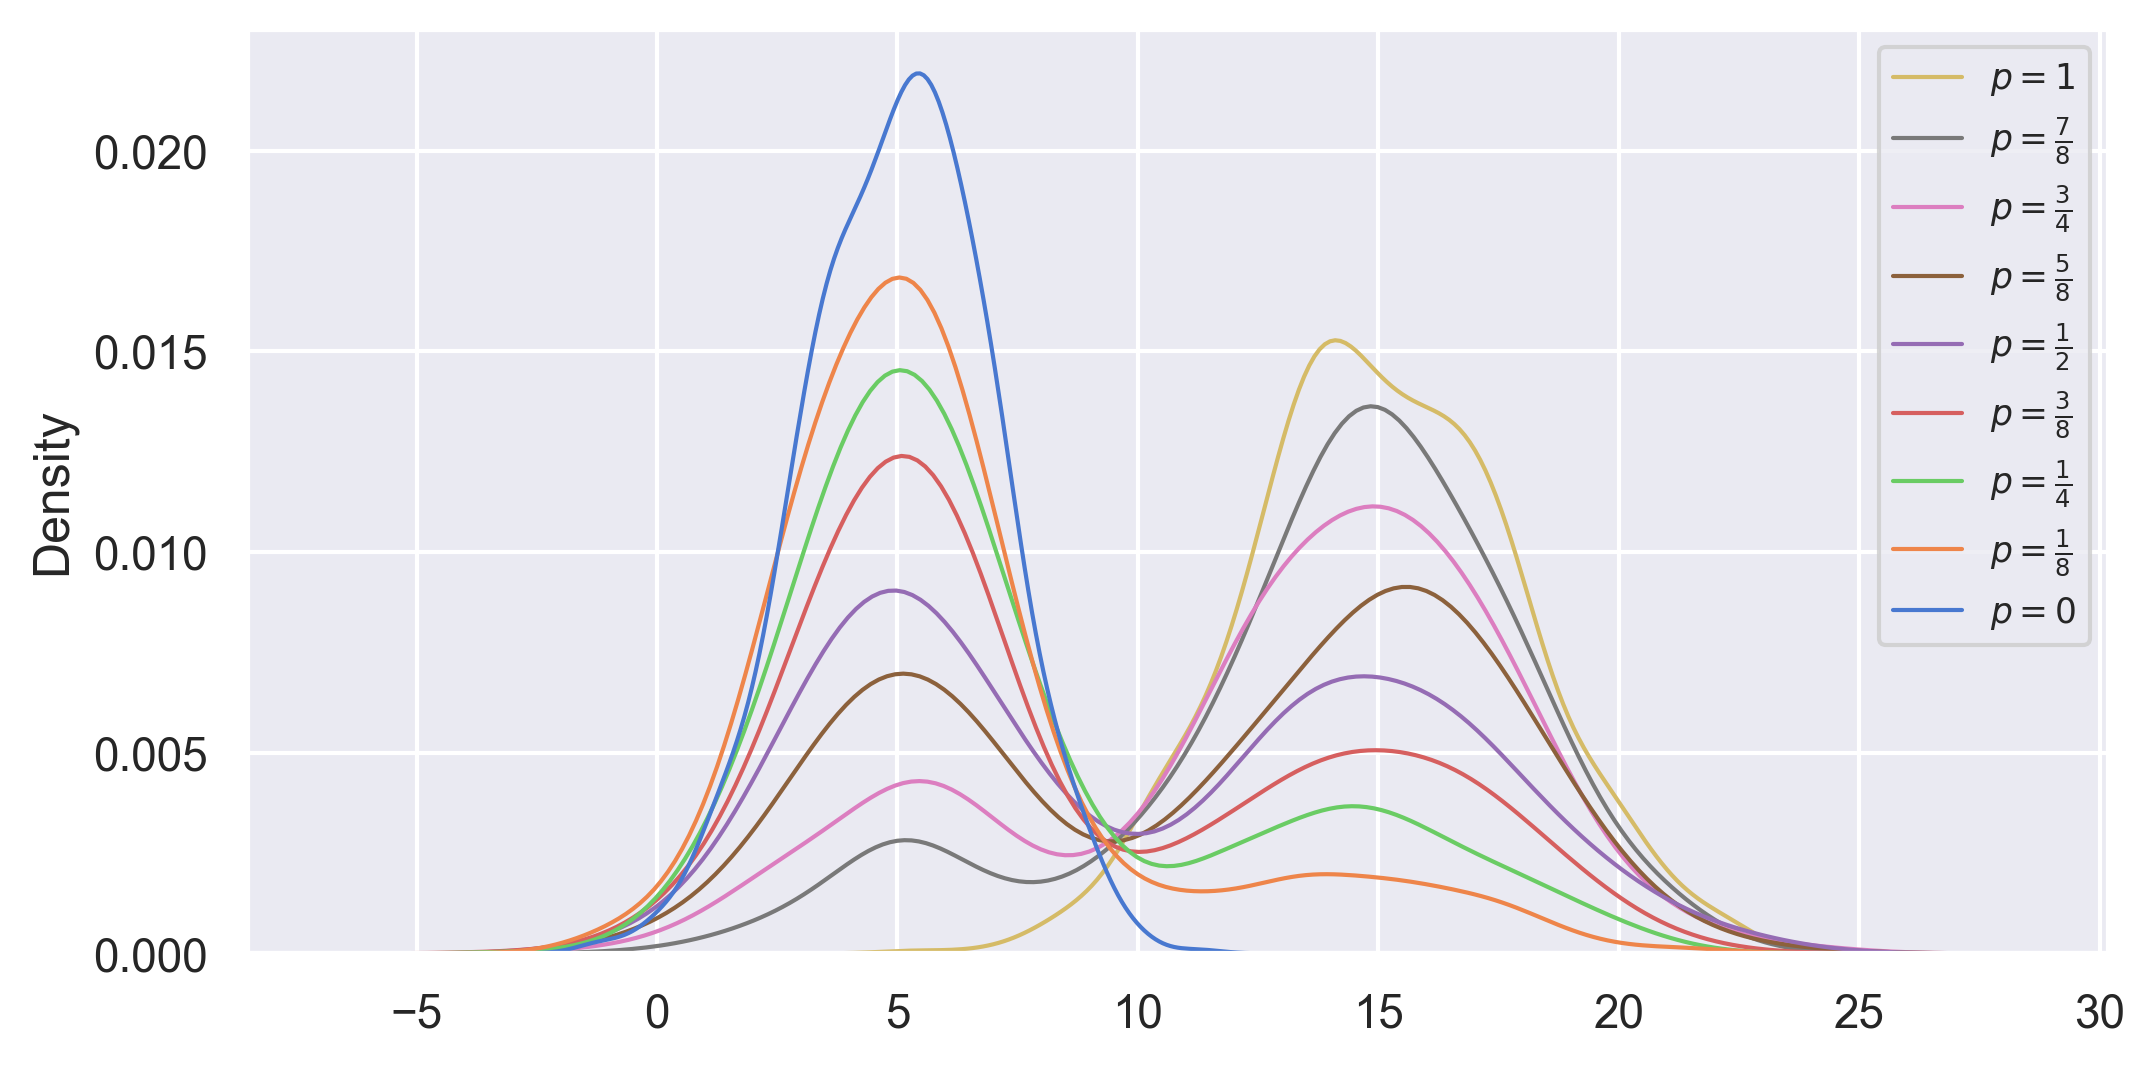

In [7]:
plt.figure(dpi=300, figsize=(8, 4))
sns.kdeplot(df, palette=sns.color_palette("muted"), lw=1, multiple='layer')
plt.legend(labels=legend[::-1] ,fontsize='x-small')

## 参数$\mu$的影响

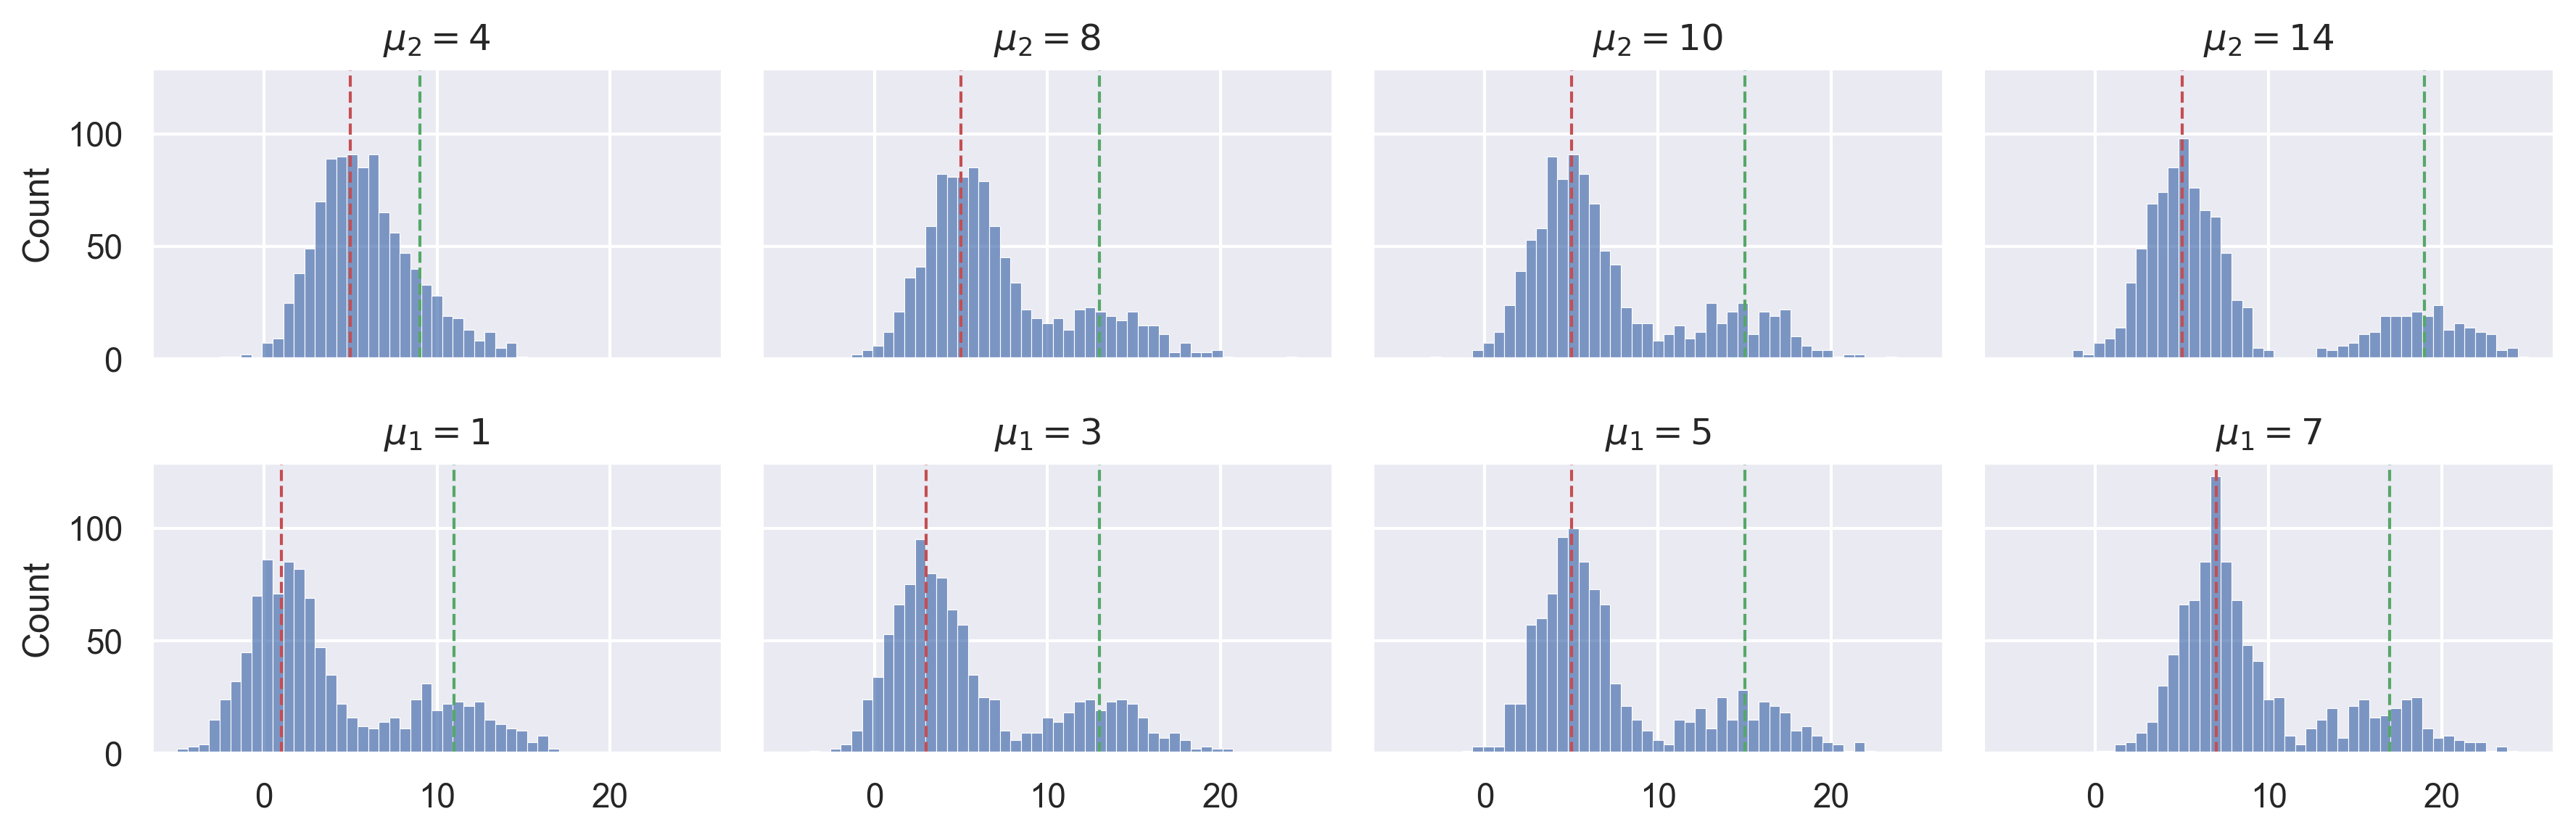

In [8]:
sns.set_style('darkgrid')
mu1_s = [1, 3, 5, 7]
mu2_s = [4, 8, 10, 14]
fig, ax = plt.subplots(ncols=4, nrows=2, dpi=300, figsize=(12, 4), 
                      sharex=True, sharey=True)
axes = ax.flatten()

df2 = pd.DataFrame()
for i in range(4):
    mu2 = mu2_s[i]
    df2[mu2] = generate_gauss_mixture(5, 2, mu2, 2, 0.25)
    sns.histplot(df2[mu2], ax=axes[i], bins=np.linspace(-5, 25, 50), alpha=0.7)
    axes[i].set_title(f'$\mu_2={mu2}$')
    axes[i].set_xlabel('')
    axes[i].axvline(x=5, color='r', ls='--', lw=1)
    axes[i].axvline(x=mu2+5, color='g', ls='--', lw=1)

df1 = pd.DataFrame()
for i in range(4):
    mu1 = mu1_s[i]
    df1[mu1] = generate_gauss_mixture(mu1, 2, 10, 2, 0.25)
    sns.histplot(df1[mu1], ax=axes[i+4], bins=np.linspace(-5, 25, 50), alpha=0.7)
    axes[i+4].set_title(f'$\mu_1={mu1}$')
    axes[i+4].set_xlabel('')
    axes[i+4].axvline(x=mu1, color='r', ls='--', lw=1)
    axes[i+4].axvline(x=10+mu1, color='g', ls='--', lw=1)
    
plt.tight_layout()

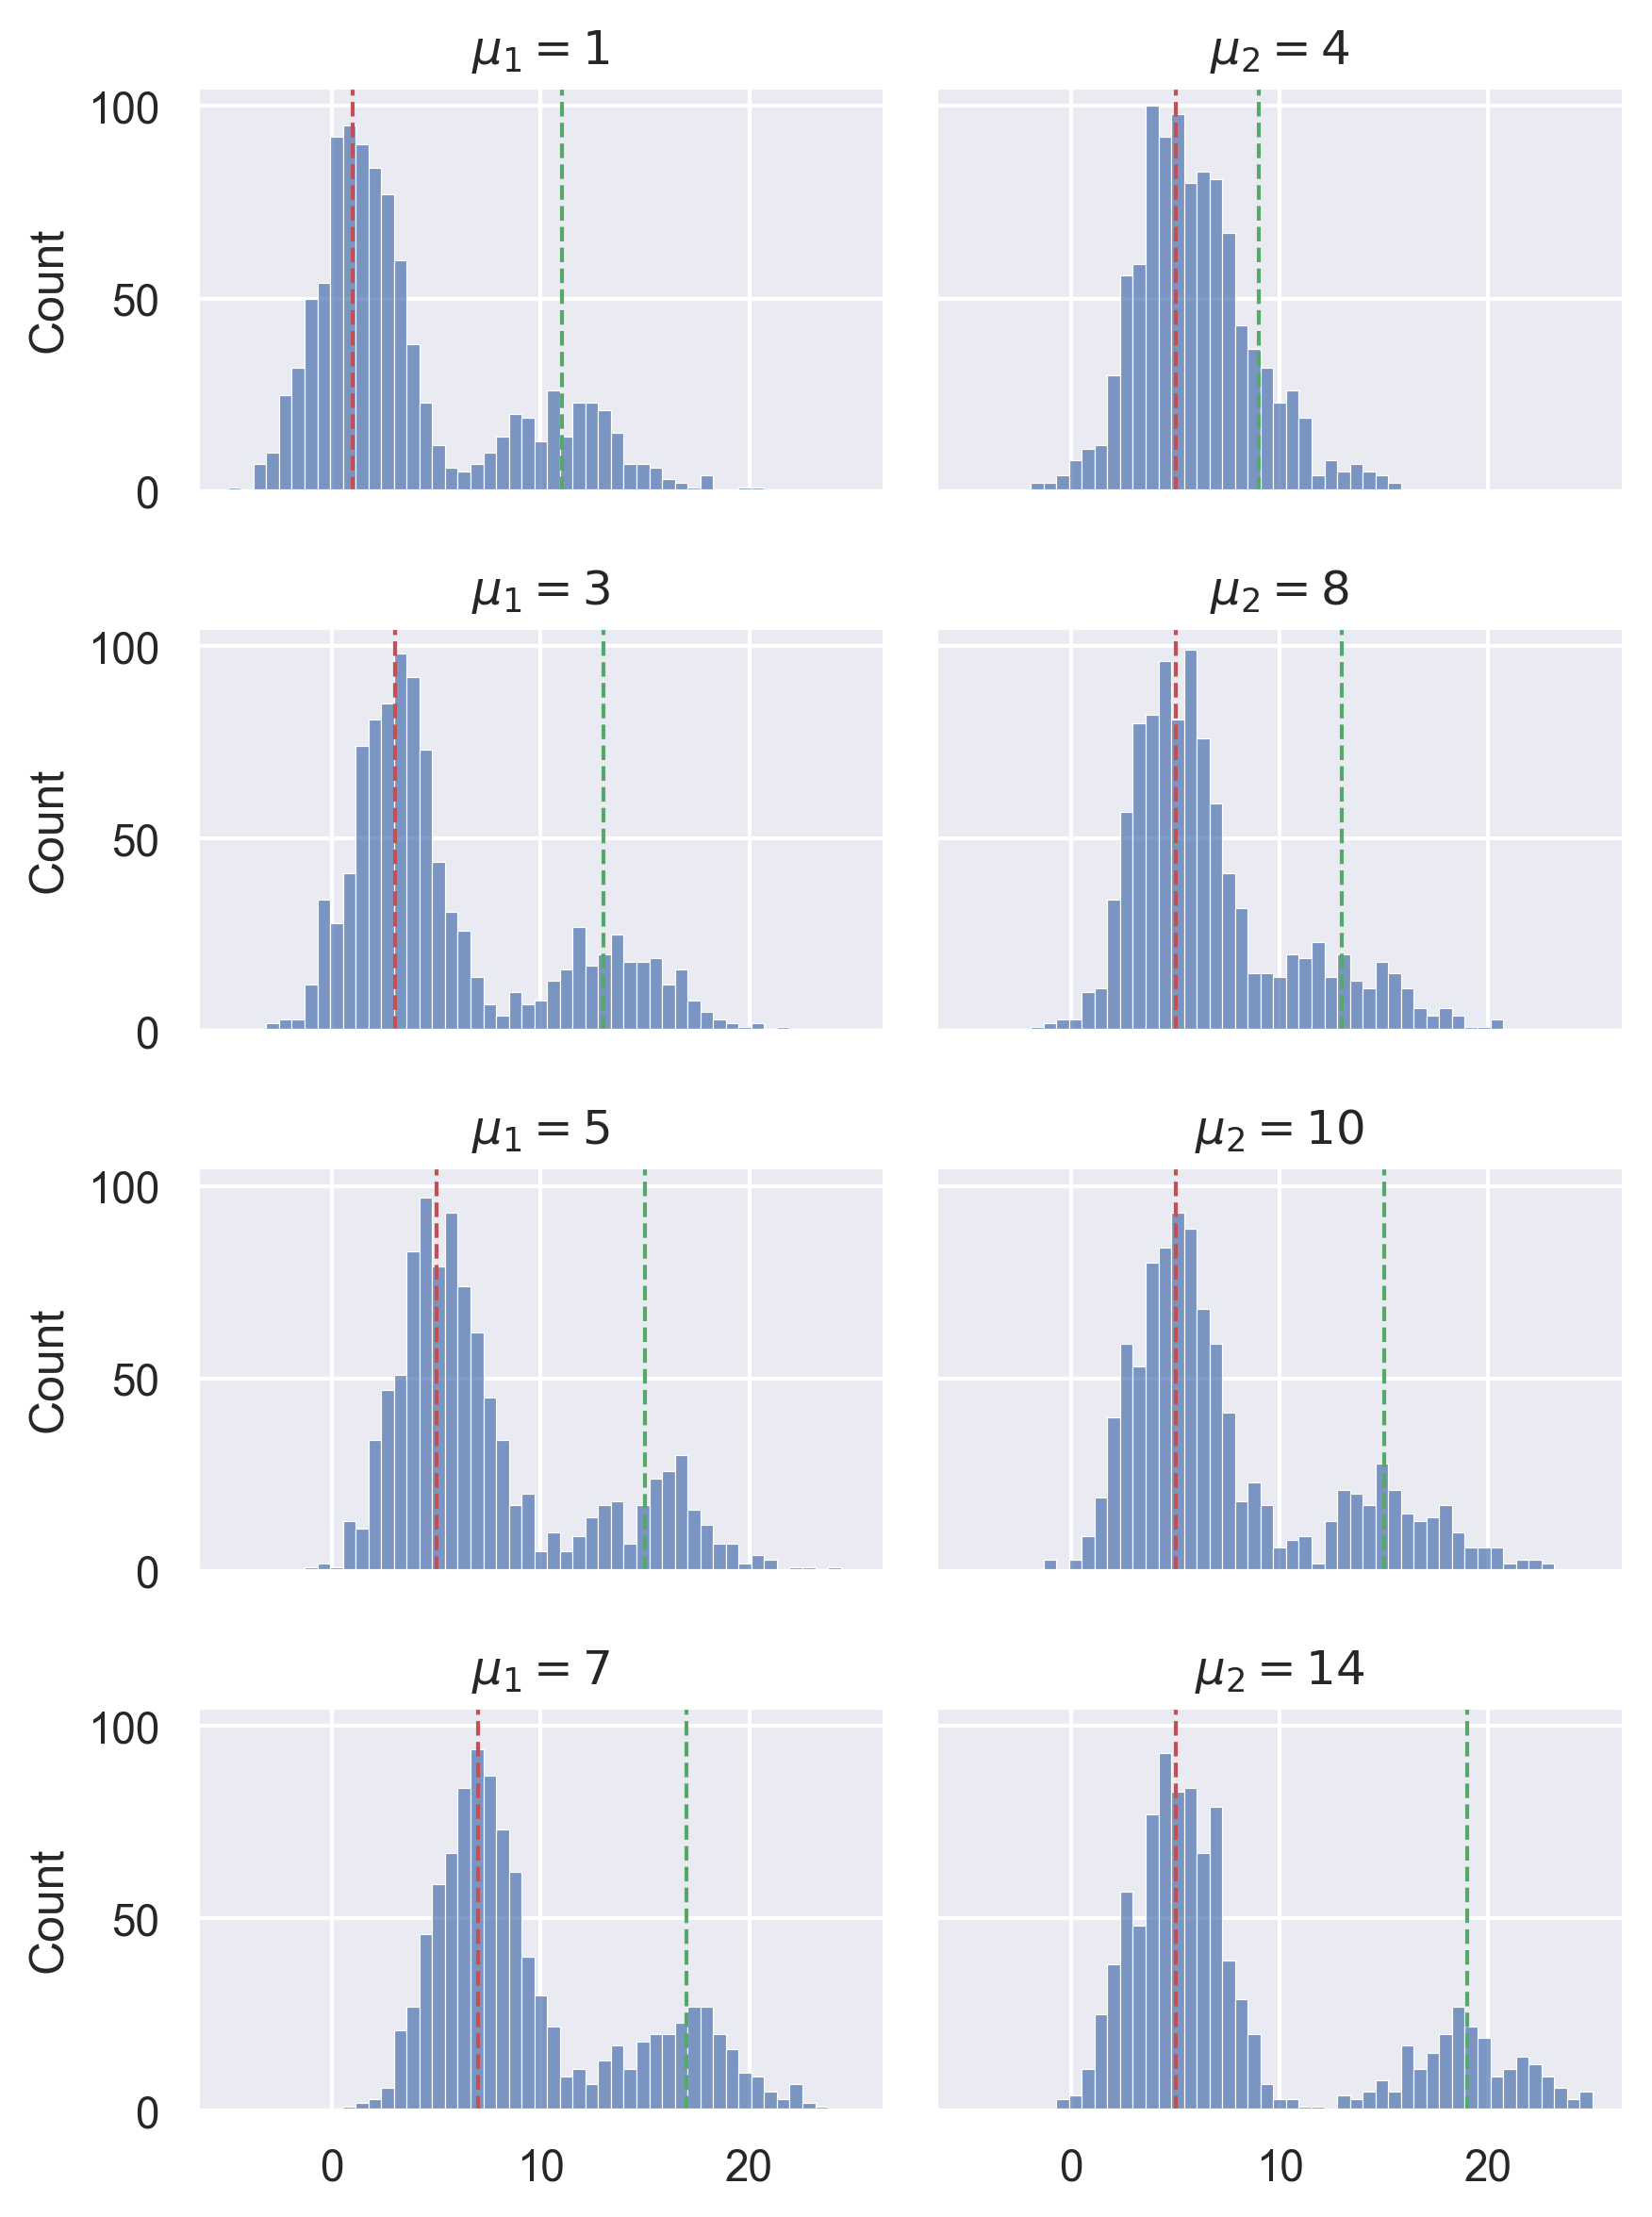

In [9]:
sns.set_style('darkgrid')
mu1_s = [1, 3, 5, 7]
mu2_s = [4, 8, 10, 14]
fig, ax = plt.subplots(ncols=2, nrows=4, dpi=300, figsize=(6, 8), 
                      sharex=True, sharey=True)

df1 = pd.DataFrame()
df2 = pd.DataFrame()
for i in range(4):
    mu2 = mu2_s[i]
    df2[mu2] = generate_gauss_mixture(5, 2, mu2, 2, 0.25)
    sns.histplot(df2[mu2], ax=ax[i][1], bins=np.linspace(-5, 25, 50), alpha=0.7)
    ax[i][1].set_title(f'$\mu_2={mu2}$')
    ax[i][1].set_xlabel('')
    ax[i][1].axvline(x=5, color='r', ls='--', lw=1)
    ax[i][1].axvline(x=mu2+5, color='g', ls='--', lw=1)

    mu1 = mu1_s[i]
    df1[mu1] = generate_gauss_mixture(mu1, 2, 10, 2, 0.25)
    sns.histplot(df1[mu1], ax=ax[i][0], bins=np.linspace(-5, 25, 50), alpha=0.7)
    ax[i][0].set_title(f'$\mu_1={mu1}$')
    ax[i][0].set_xlabel('')
    ax[i][0].axvline(x=mu1, color='r', ls='--', lw=1)
    ax[i][0].axvline(x=10+mu1, color='g', ls='--', lw=1)
    
plt.tight_layout()

<Axes: ylabel='Density'>

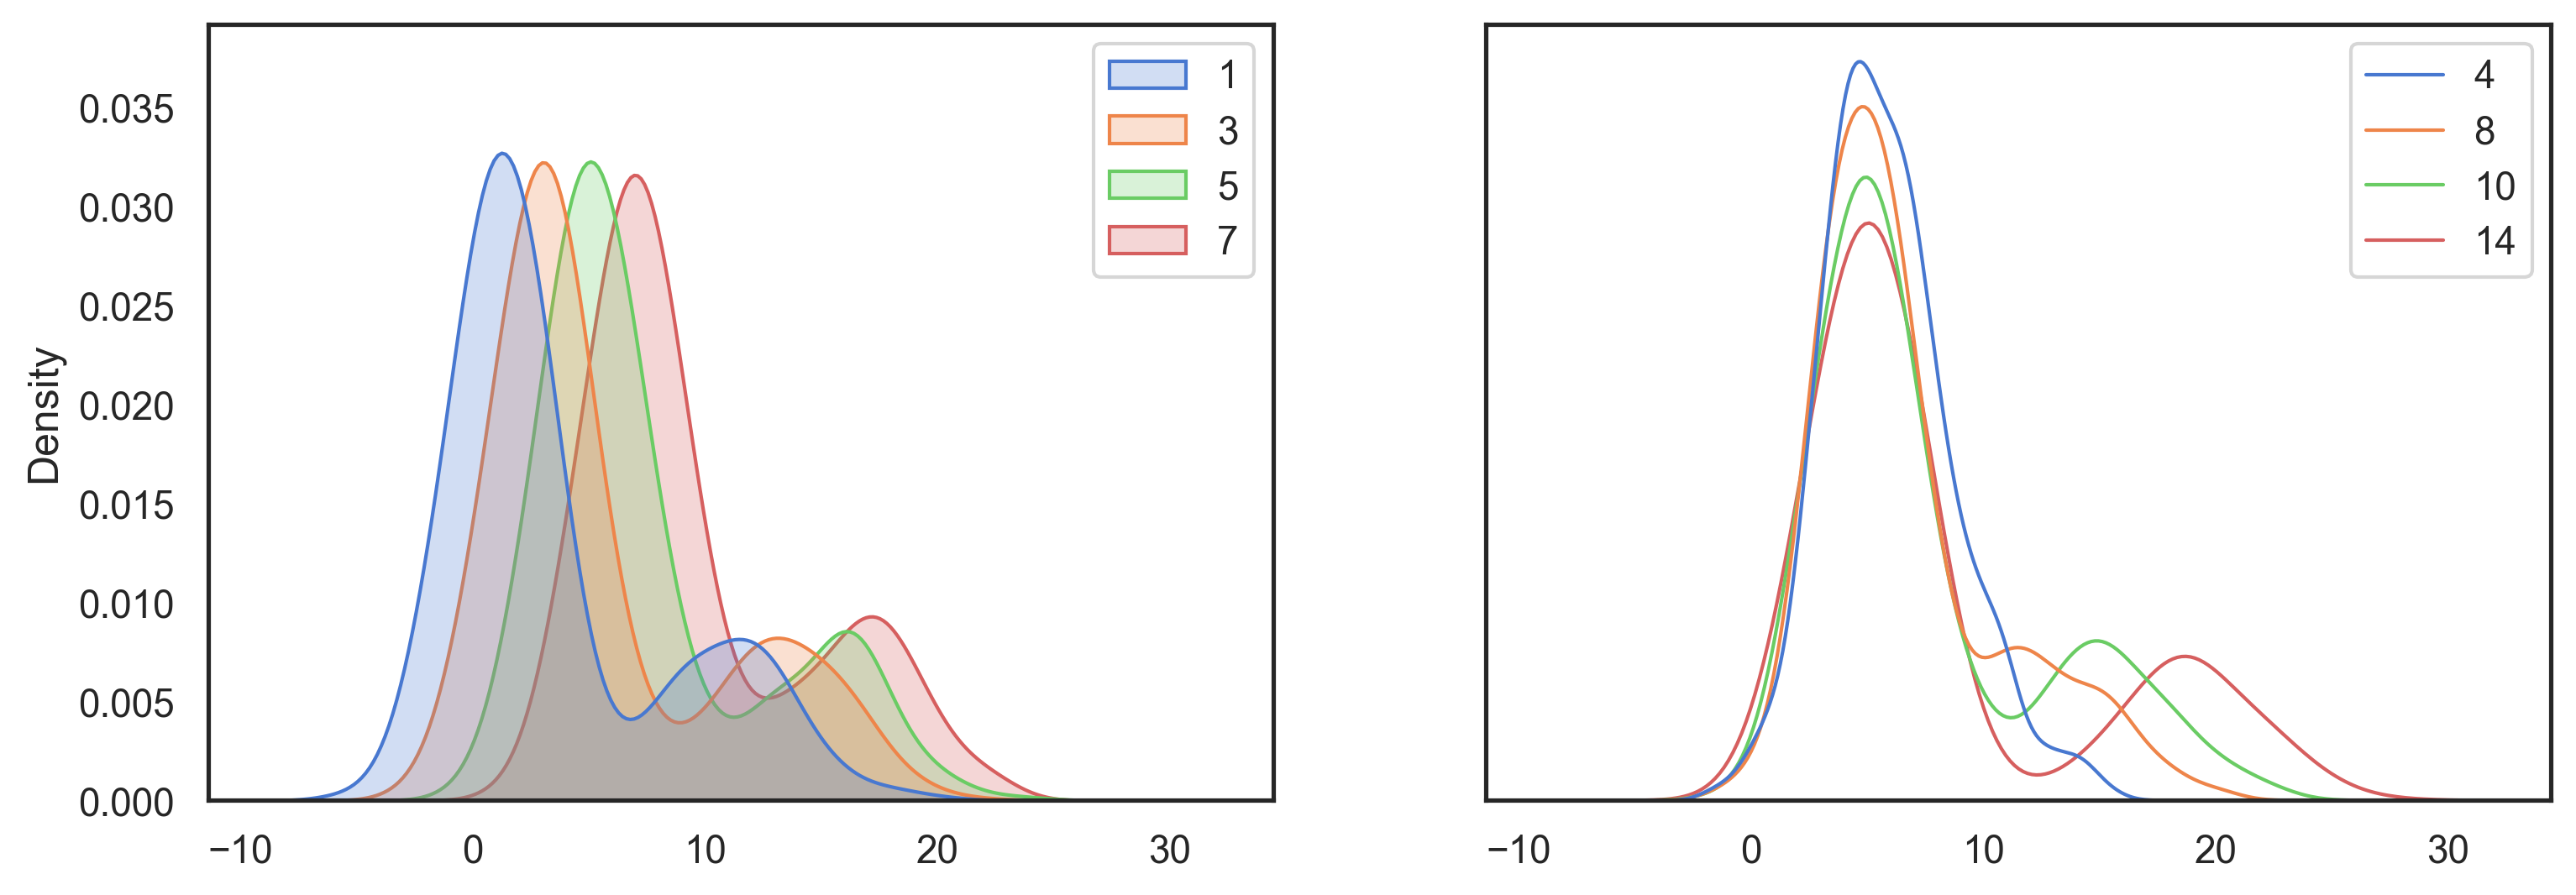

In [10]:
sns.set_style('white')
fig, ax = plt.subplots(ncols=2, nrows=1, dpi=300, figsize=(12, 4), 
                      sharex=True, sharey=True)
axes = ax.flatten()
sns.kdeplot(df1, palette=sns.color_palette("muted"), lw=1, multiple='layer', shade=True, ax=axes[0])
sns.kdeplot(df2, palette=sns.color_palette("muted"), lw=1, multiple='layer', ax=axes[1])

## 参数$\sigma$的影响

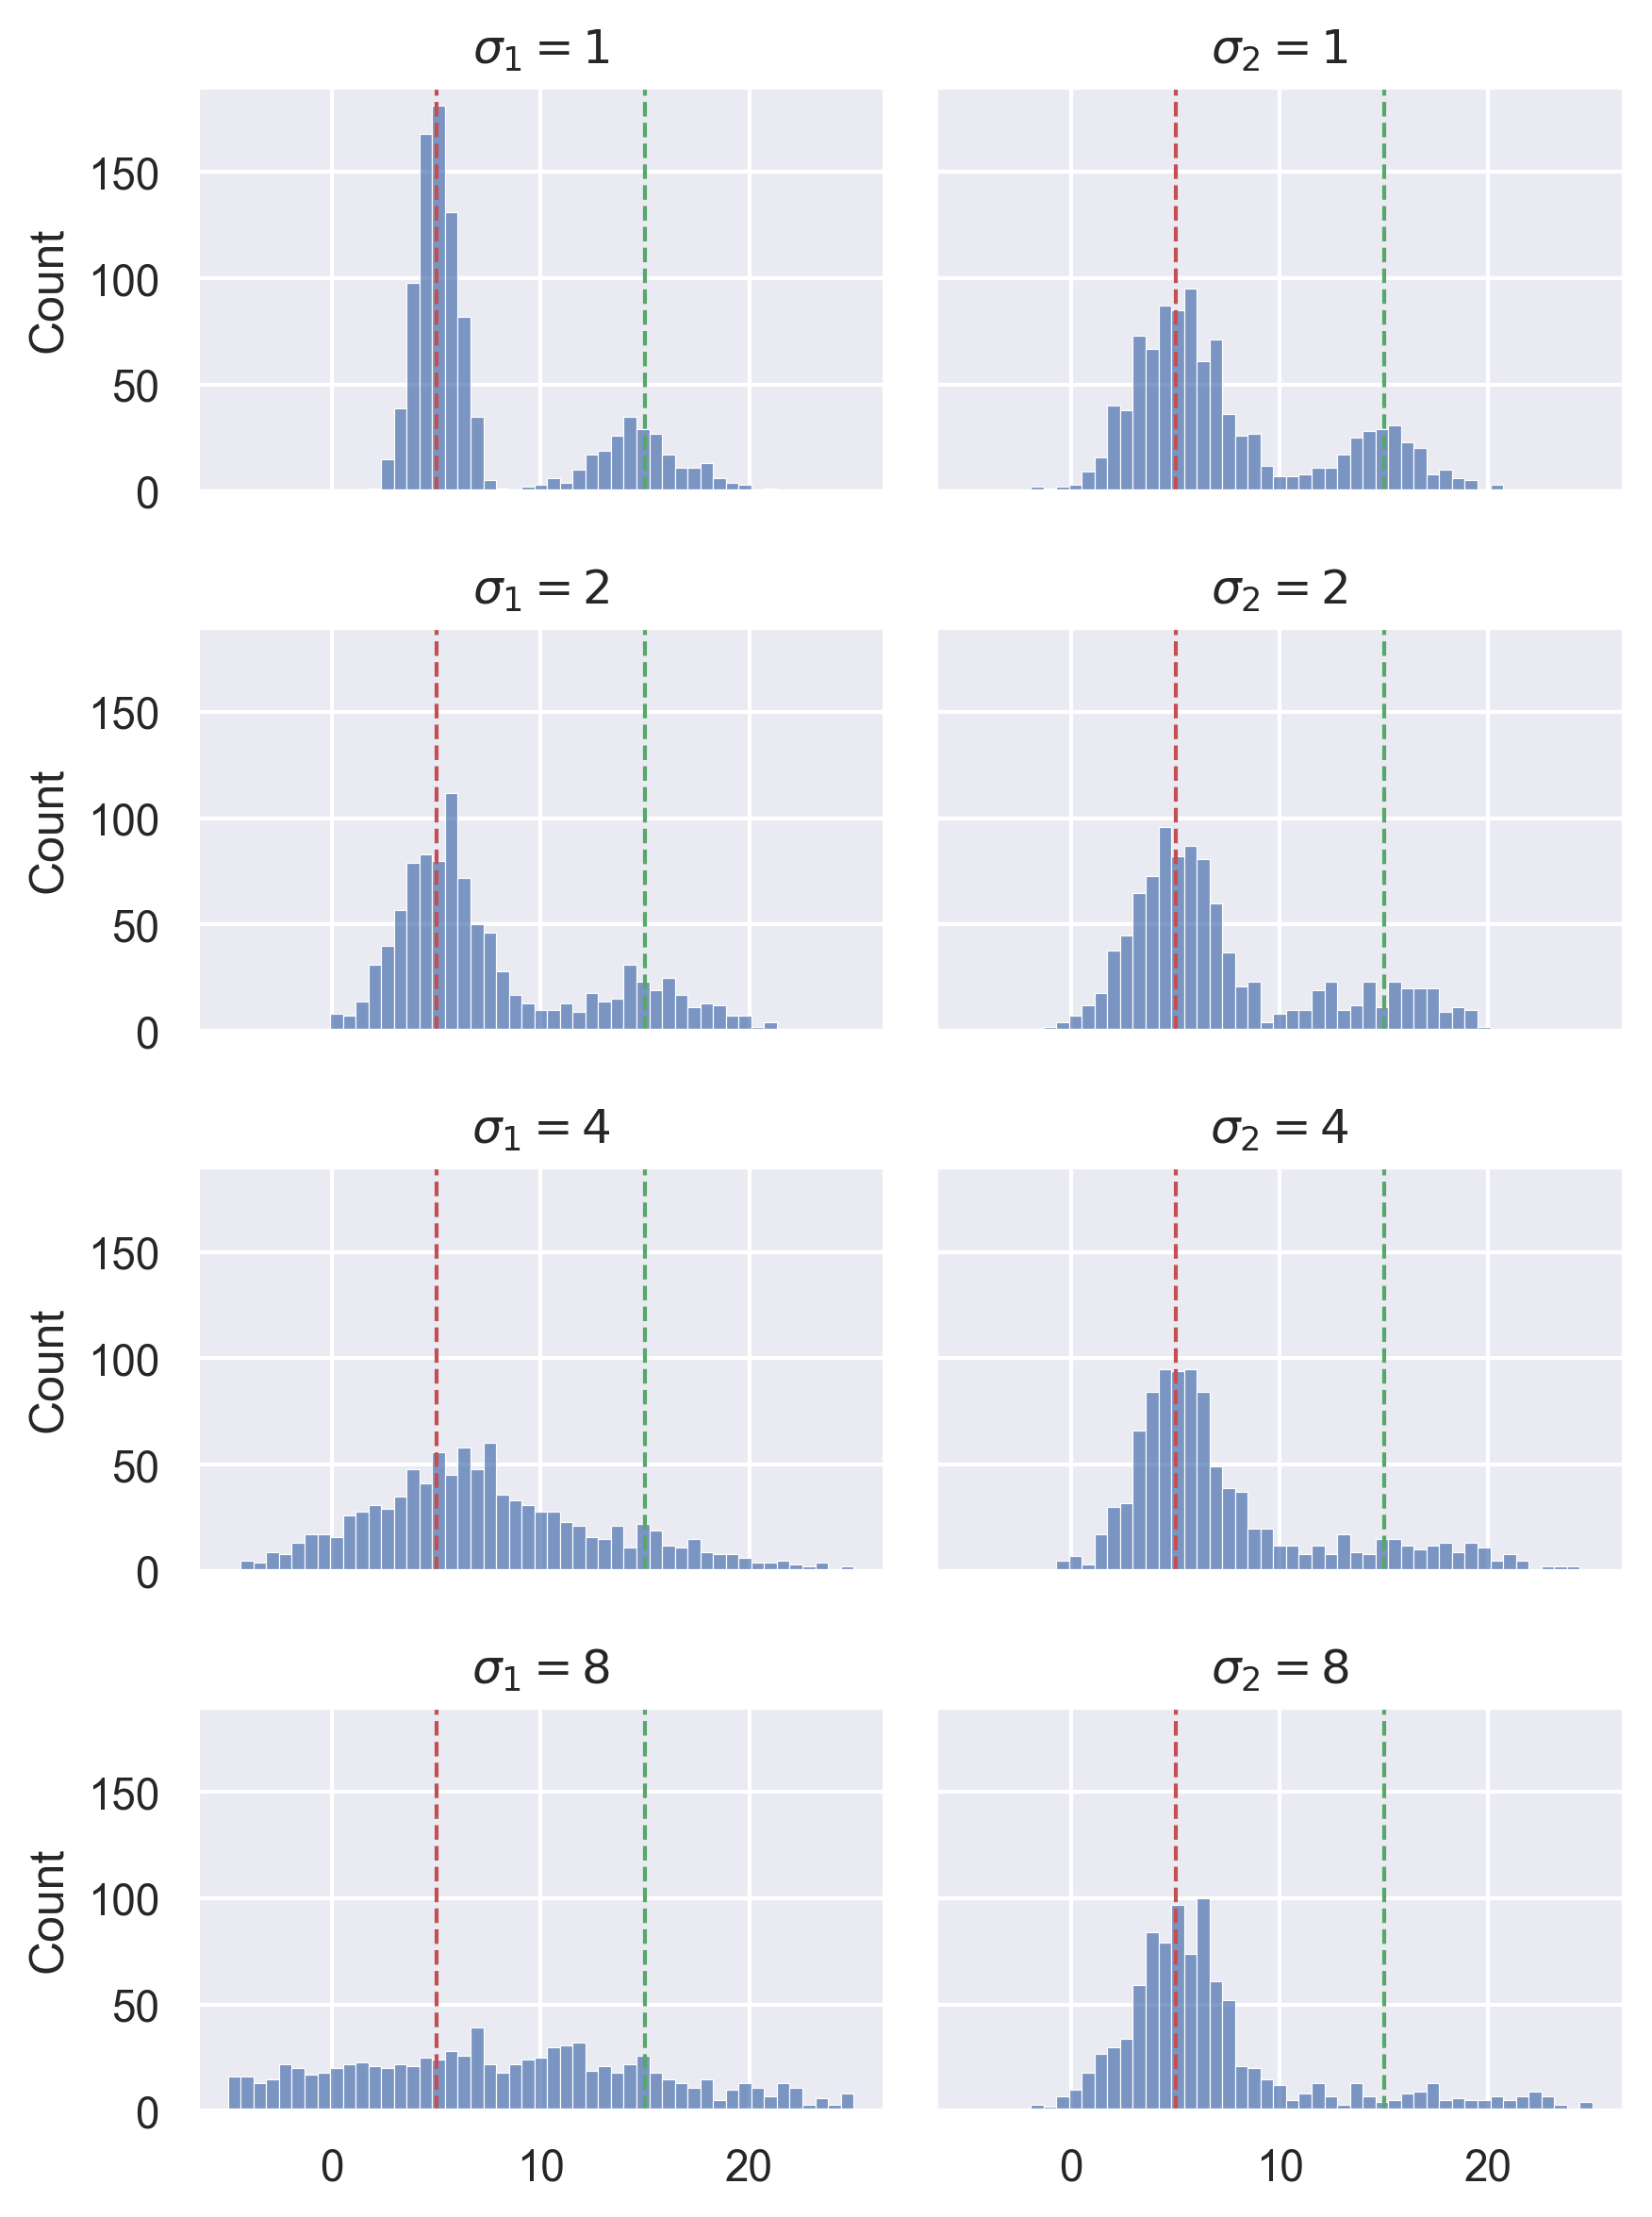

In [11]:
sns.set_style('darkgrid')
sigma1_s = [1, 2, 4, 8]
sigma2_s = [1, 2, 4, 8]
fig, ax = plt.subplots(ncols=2, nrows=4, dpi=300, figsize=(6, 8), 
                      sharex=True, sharey=True)

df1 = pd.DataFrame()
df2 = pd.DataFrame()
for i in range(4):
    sigma2 = sigma2_s[i]
    df2[sigma2] = generate_gauss_mixture(5, 2, 10, sigma2, 0.25)
    sns.histplot(df2[sigma2], ax=ax[i][1], bins=np.linspace(-5, 25, 50), alpha=0.7)
    ax[i][1].set_title(f'$\sigma_2={sigma2}$')
    ax[i][1].set_xlabel('')
    ax[i][1].axvline(x=5, color='r', ls='--', lw=1)
    ax[i][1].axvline(x=15, color='g', ls='--', lw=1)

    sigma1 = sigma1_s[i]
    df1[sigma1] = generate_gauss_mixture(5, sigma1, 10, 2, 0.25)
    sns.histplot(df1[sigma1], ax=ax[i][0], bins=np.linspace(-5, 25, 50), alpha=0.7)
    ax[i][0].set_title(f'$\sigma_1={sigma1}$')
    ax[i][0].set_xlabel('')
    ax[i][0].axvline(x=5, color='r', ls='--', lw=1)
    ax[i][0].axvline(x=15, color='g', ls='--', lw=1)
    
plt.tight_layout()

# 任务二

In [12]:
def generate_U(mu1, sigma1, mu2, sigma2, p, n=1000):
    Us = []
    E = mu1 + p * mu2
    D = sigma1**2 + p * sigma2 ** 2 +p*(1-p) * mu2**2
    for i in range(1000):
        zs = generate_gauss_mixture(mu1, sigma1, mu2, sigma2, p, n)
        u = (zs.sum()-n*E)/np.sqrt(n*D)
        Us.append(u)
    return np.array(Us)

<Axes: title={'center': 'Base model: $(X, Y)\\sim \\mathcal{N}(5,2;10,2;0),\\ p=0.25,\\ n=1000$'}, ylabel='Count'>

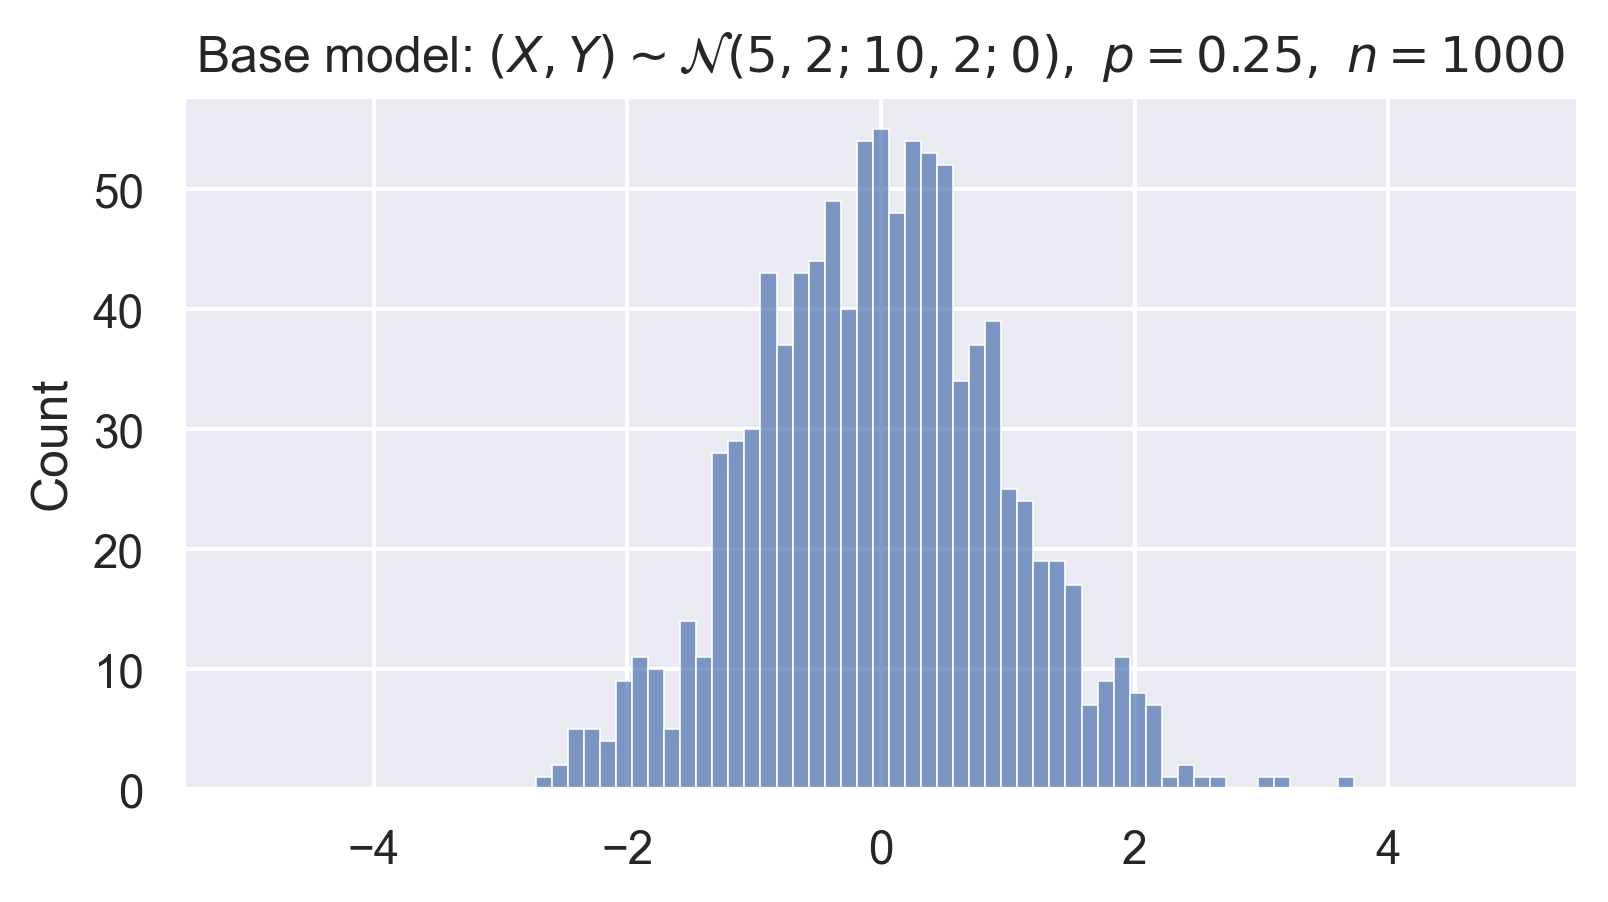

In [13]:
plt.figure(dpi=300, figsize=(6,3))
tmp = generate_U(5, 2, 10, 2, 0.25)
plt.title('Base model: $(X, Y)\sim \mathcal{N}(5,2;10,2;0),\ p=0.25,\ n=1000$')
sns.histplot(tmp, bins=np.linspace(-5, 5, 80), alpha=0.7)

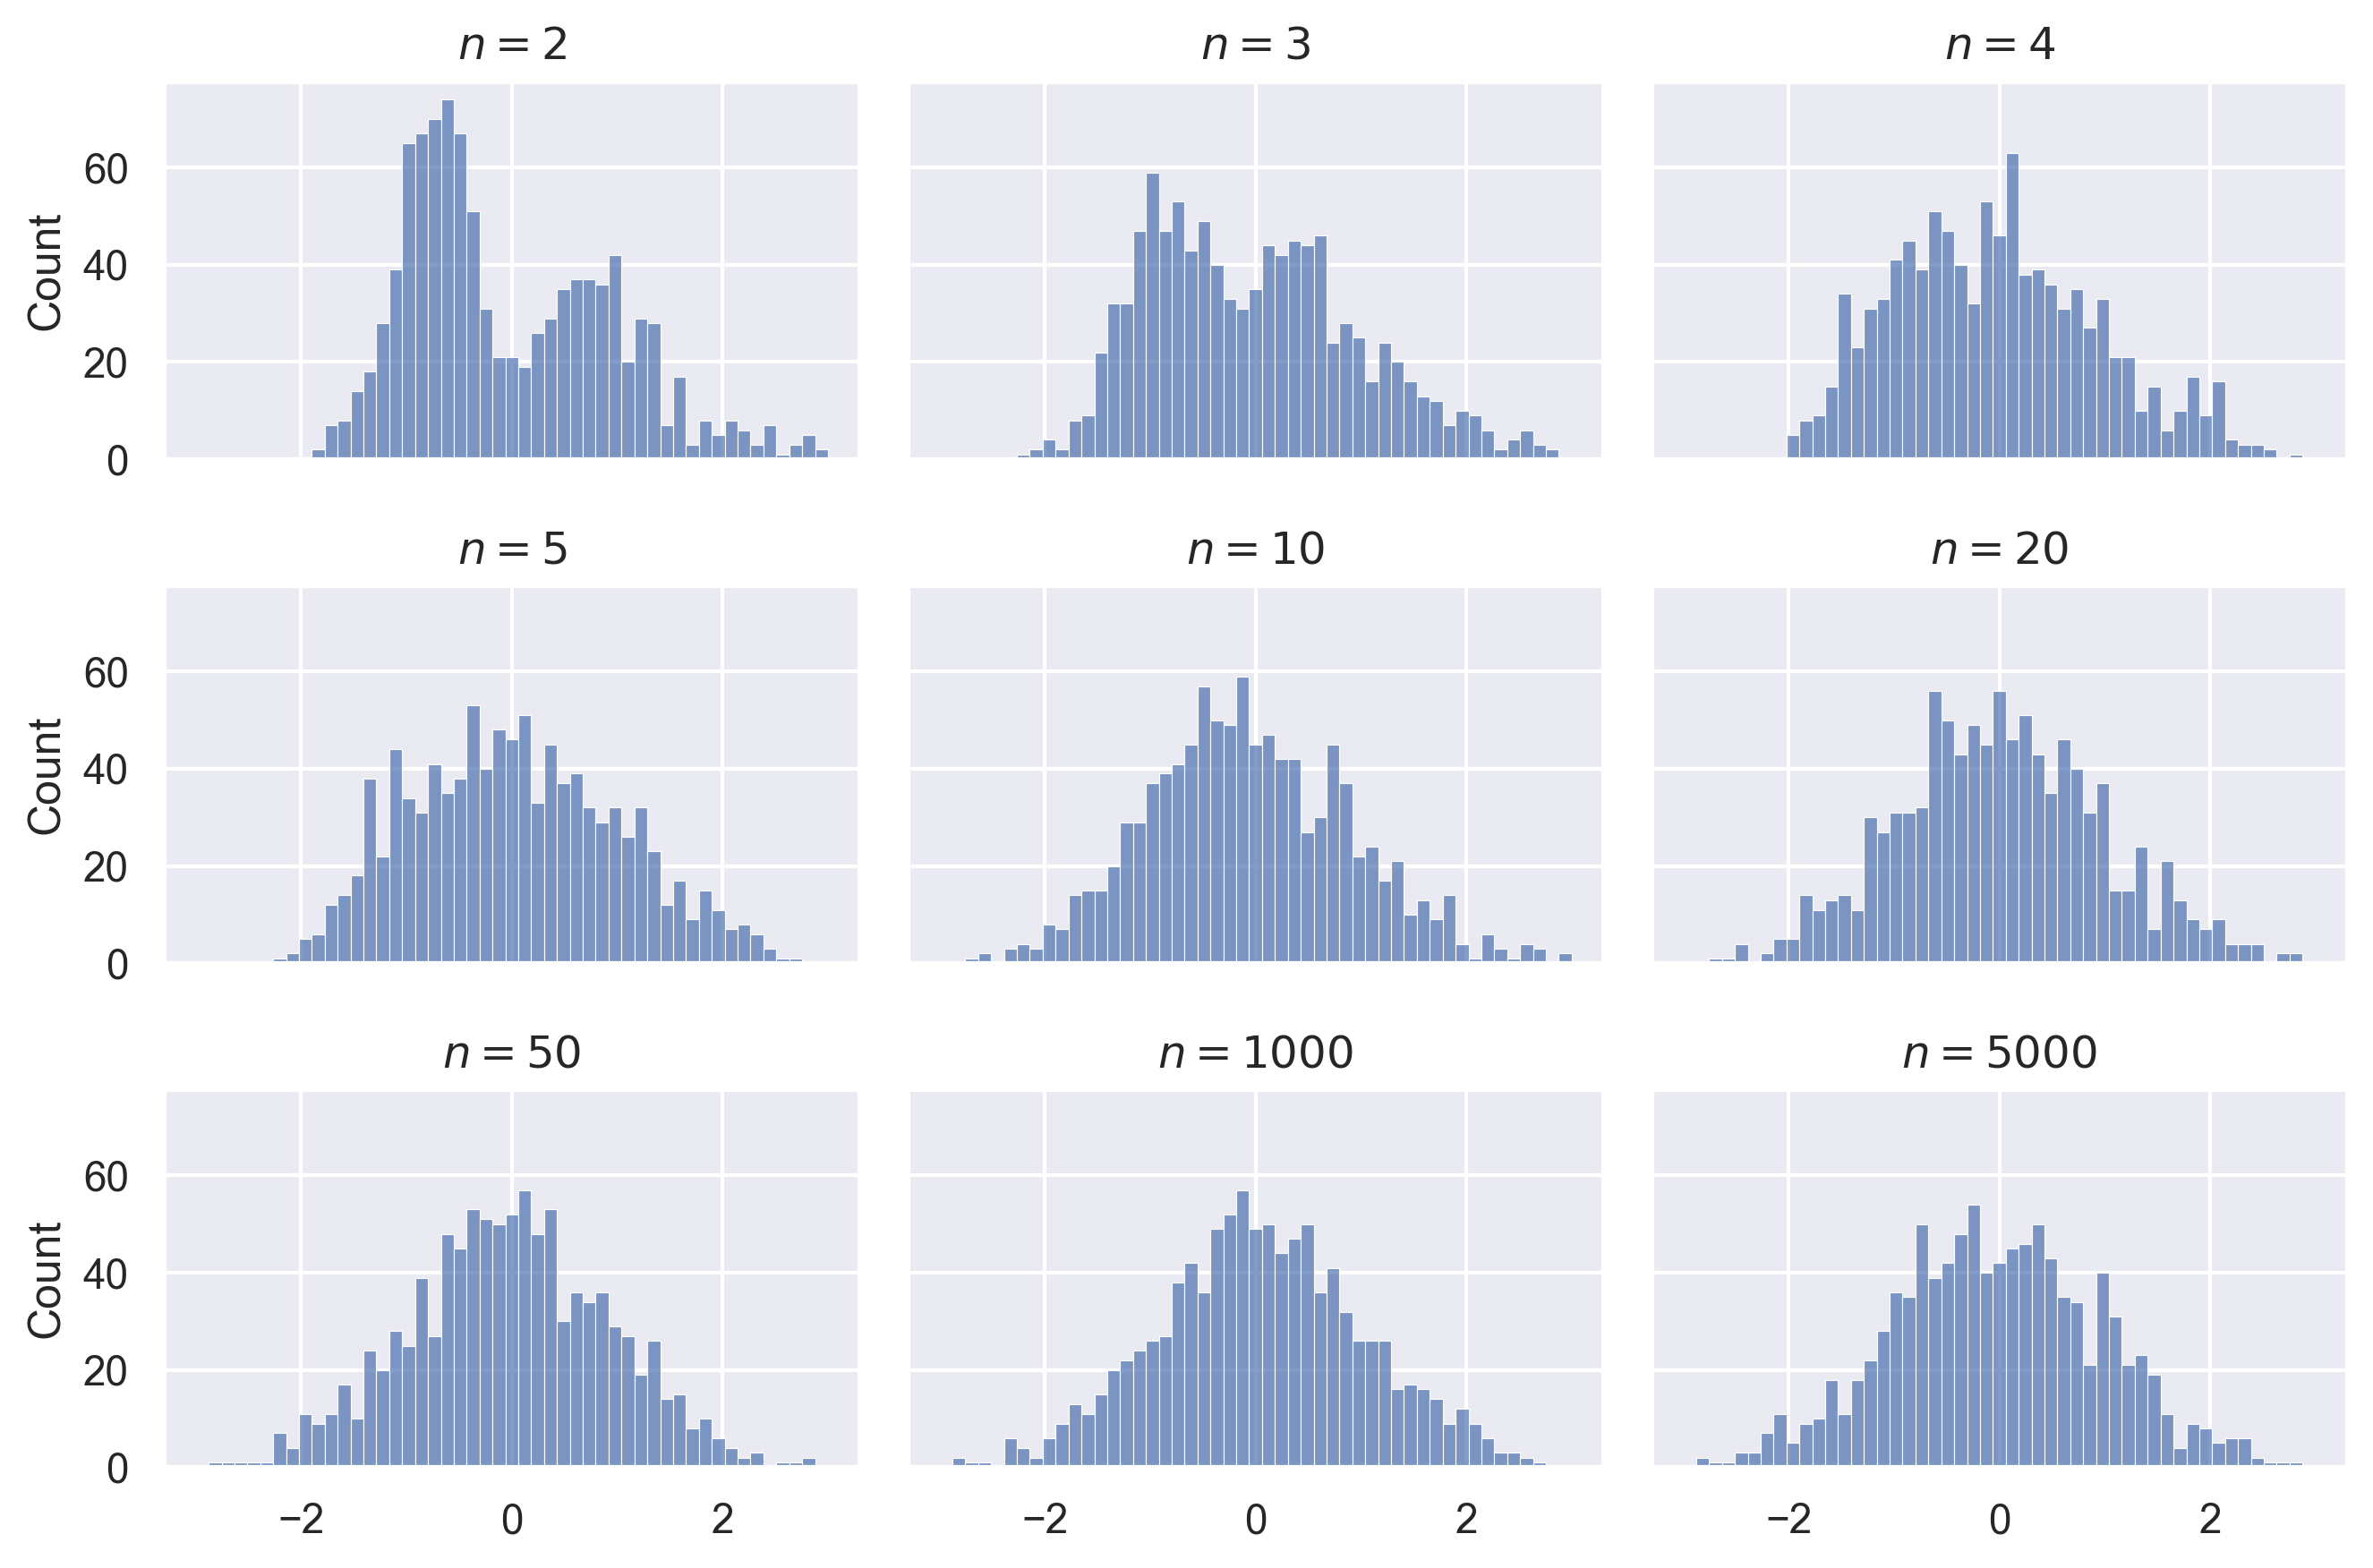

In [14]:
fig, ax = plt.subplots(ncols=3, nrows=3, dpi=300, figsize=(9, 6), 
                      sharex=True, sharey=True)
axes = ax.flatten()

df = pd.DataFrame()
ns = [2, 3, 4, 5, 10, 20, 50, 1000, 5000]
for i in range(len(ps)):
    n = ns[i]
    df[n] = generate_U(5, 2, 10, 2, 0.25, n)
    sns.histplot(df[n], ax=axes[i], bins=np.linspace(-3, 3, 50), alpha=0.7)
    axes[i].set_title(f'$n={n}$')
    axes[i].set_xlabel('')

plt.tight_layout()